In [1]:
import sys, os

hostname = os.uname()[1]

if "crc" in hostname:
    scriptdir = "/cr/users/filip/bin/"
elif "beep-boop" == hostname:
    scriptdir = "/home/quizznor/projects/phd-thesis/bin/"

sys.path.append(scriptdir)

from utils.binaries import *
from utils.plotting import *

03:23:34 [INFO] utils          -- (+12435ms) -- import logging
03:23:35 [INFO] utils.binaries -- (  +225ms) -- import numpy as np


03:23:35 [INFO] utils.binaries -- (  +690ms) -- import pandas as pd
03:23:35 [INFO] utils.binaries -- (   +51ms) -- import binaries.tools as tool
03:23:36 [INFO] utils.plotting -- ( +1023ms) -- import matplotlib.pyplot as plt
03:23:38 [INFO] utils.plotting -- ( +1228ms) -- import seaborn as so
03:23:38 [DBUG] utils.plotting -- (   +20ms) -- font size set to 8
03:23:38 [DBUG] utils.plotting -- (    +1ms) -- figure size set to [6.6, 3.3]
03:23:38 [DBUG] utils.plotting -- (    +1ms) -- markersize set to 2.0
03:23:38 [DBUG] utils.plotting -- (    +0ms) -- usetex set to False
03:23:38 [INFO] utils.plotting -- (   +50ms) -- import plotting.tools as plot


In [11]:
nm, photons = np.loadtxt("moon.csv", delimiter=',', unpack=True)
sort = np.argsort(nm)

h = 6.626e-34                               # Js
c = 3e8                                     # m/s
irradiance = photons * h * c / (nm * 1e-9)
irradiance *= 1e5                           # to convert from cm2 to m2

irradiance = irradiance[sort]
nm = nm[sort]

1.625024876529603e-08


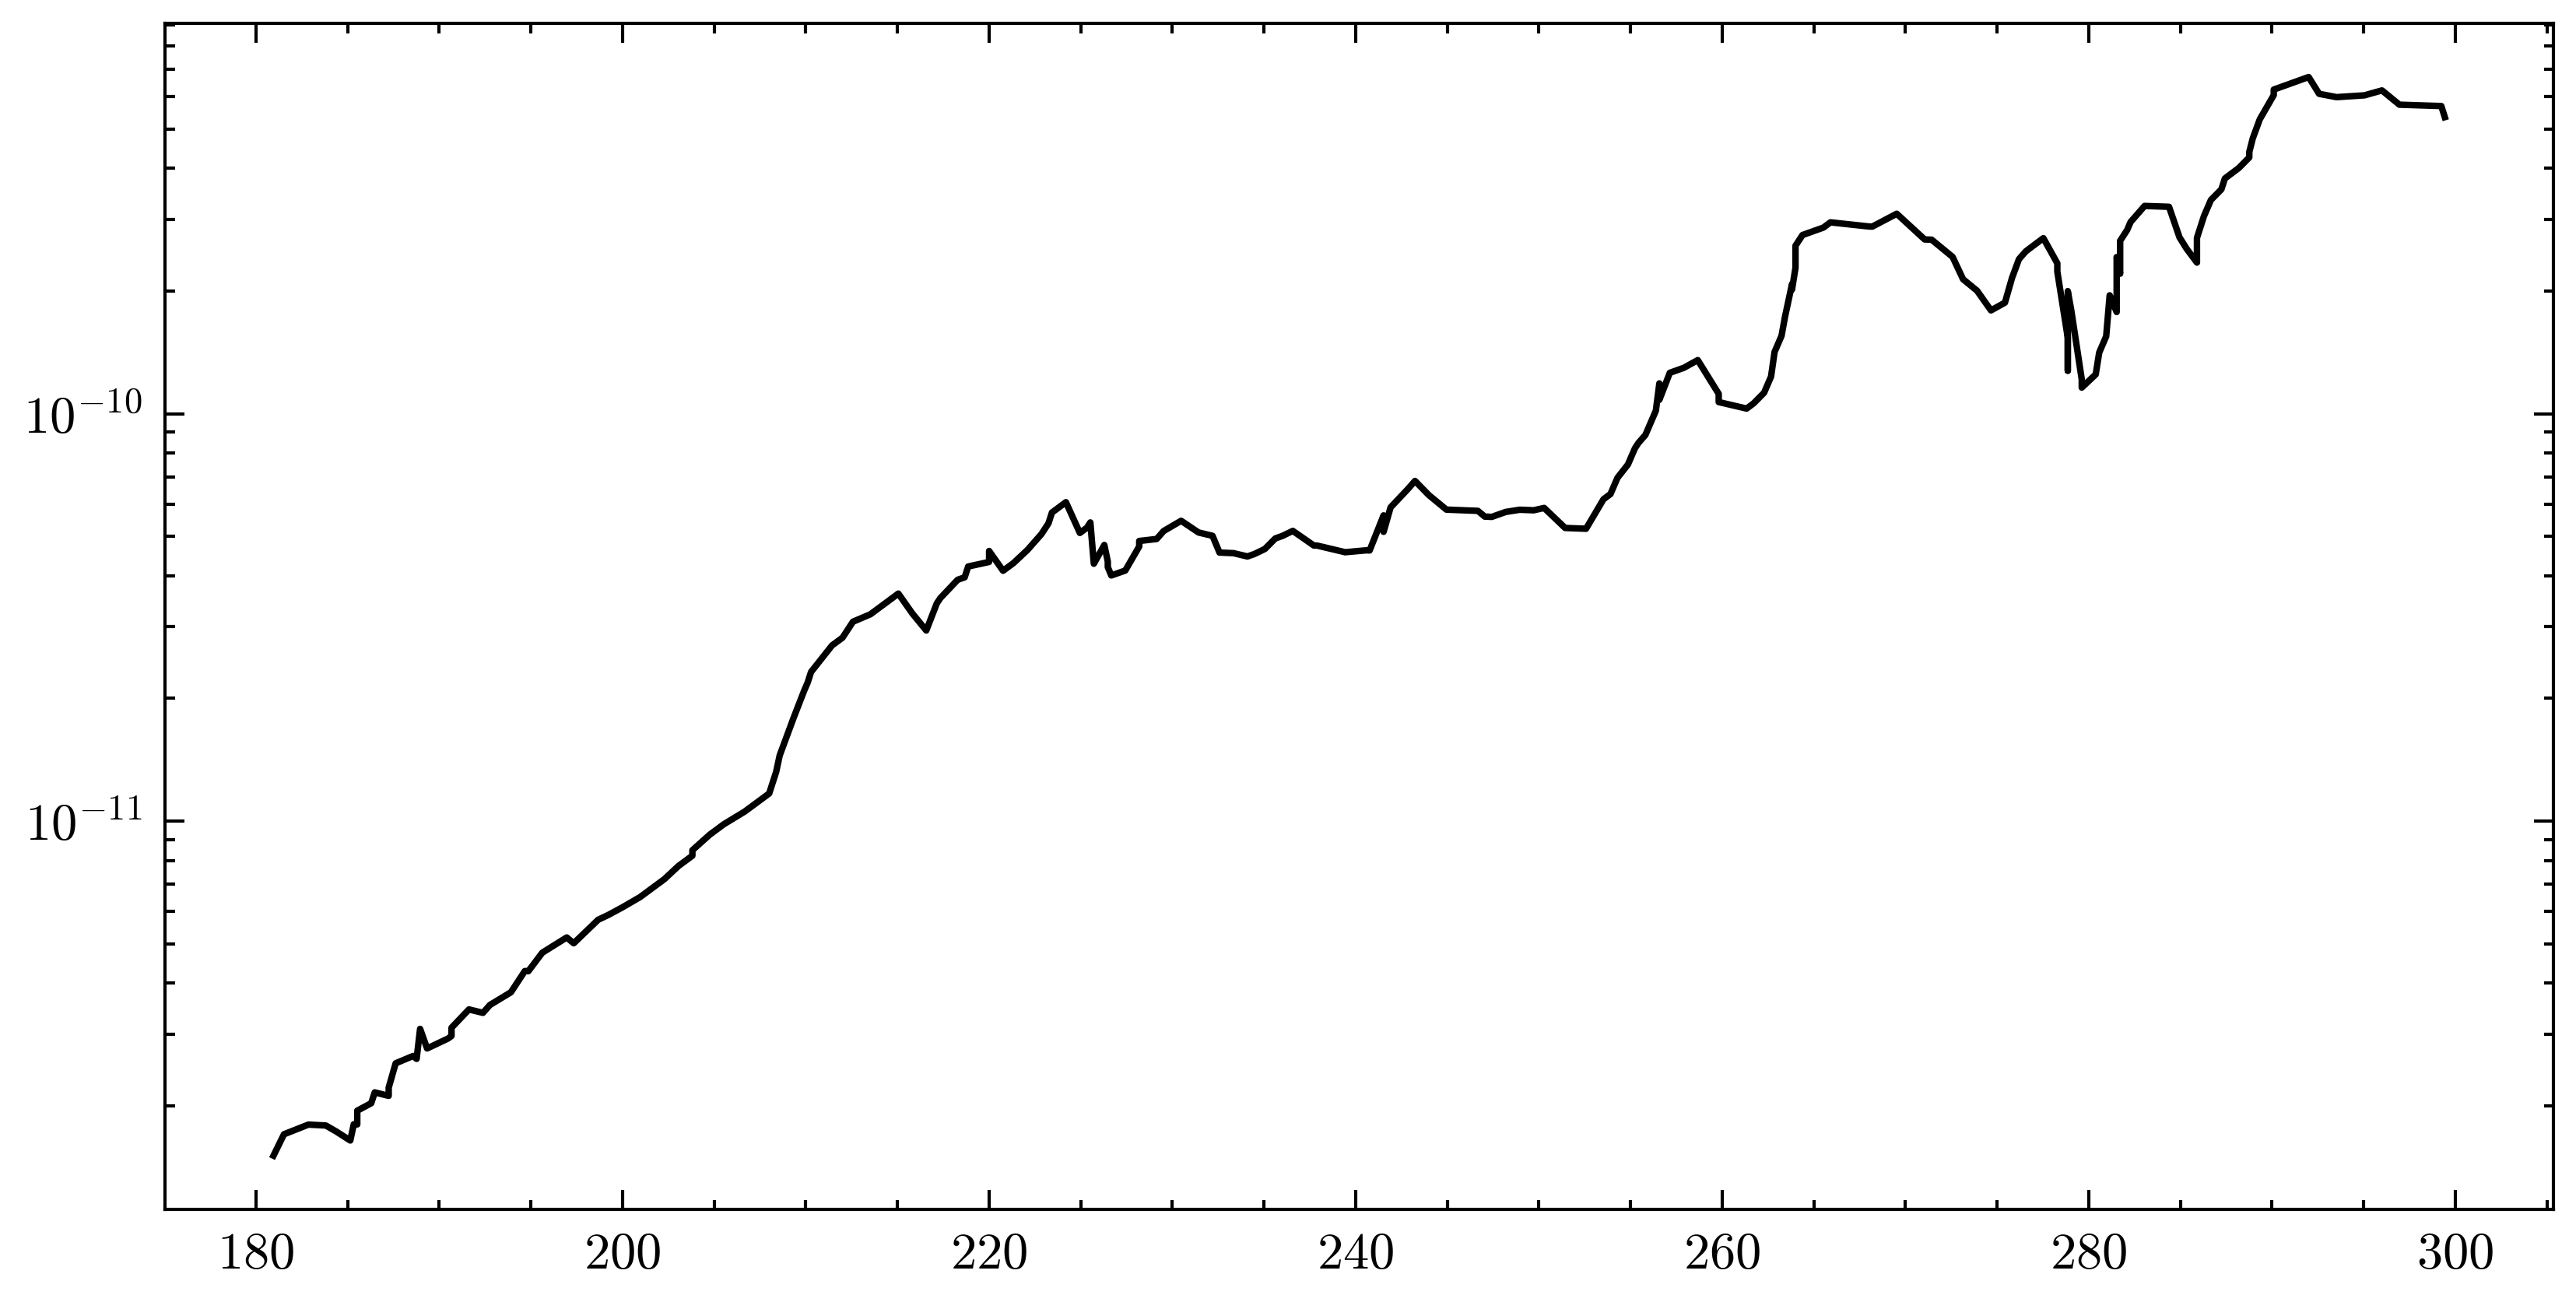

In [14]:
plt.plot(nm, irradiance)
plt.yscale('log')

int_irradiance = 0

for dx, y in zip(np.diff(nm), irradiance):
    int_irradiance += y * dx

print(int_irradiance)

In [38]:
E0 = 1e20                                                       # energy of primary particle (eV)
e_gamma = 0.5 * E0 * (1 - 1/np.log(E0/(20e9)/np.log(15)))
e_fluorescence = 5 * (e_gamma/0.85e6) * 5.894e-19               # fluorescence energy in W

t_life = 42e-9                                                  # radiation time for transition state

1447.2396243840908


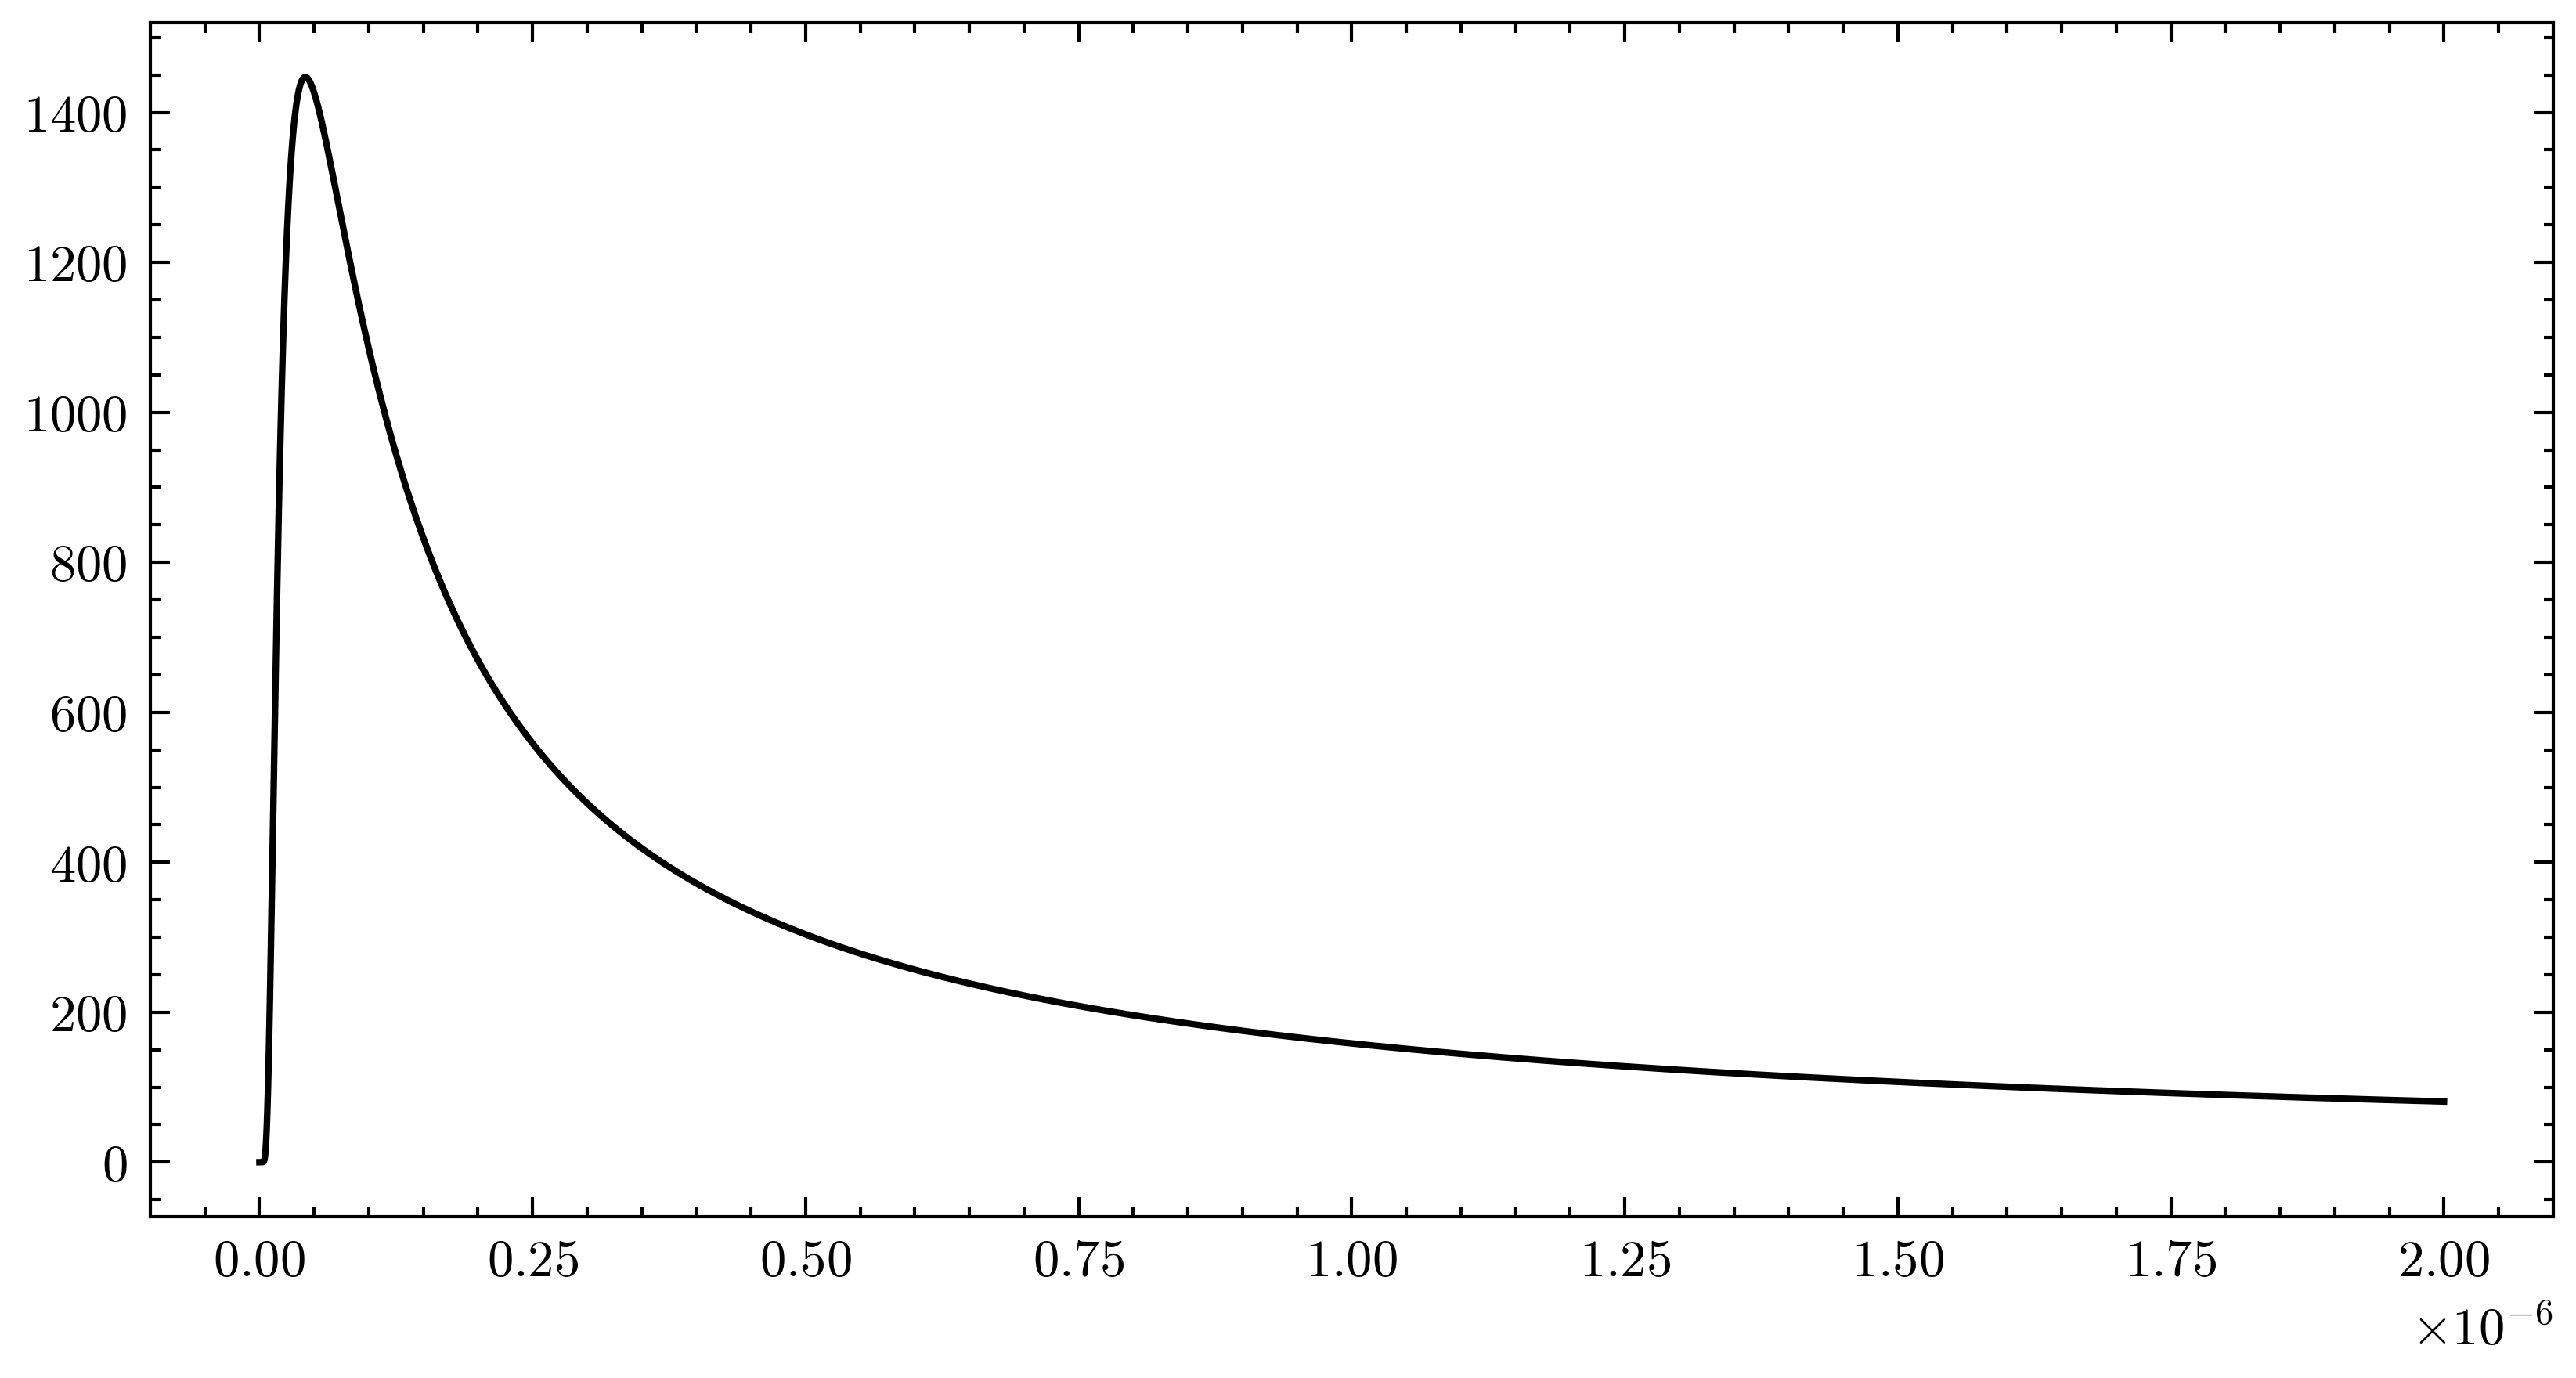

In [39]:
t = np.linspace(1e-12, 0.2e-5, int(1e4))
irradiance = e_fluorescence * np.exp(-t_life/t) / t

print(np.max(irradiance))
plt.plot(t, irradiance)

In [54]:

def calc_irradiance(distance):
    return np.max(irradiance) / (4 * np.pi * (distance)**2) / np.exp(distance/6.4)
#                                    ^ area                      ^ attenuation

In [56]:
calc_irradiance(1e3)

1.5952097054684393e-72

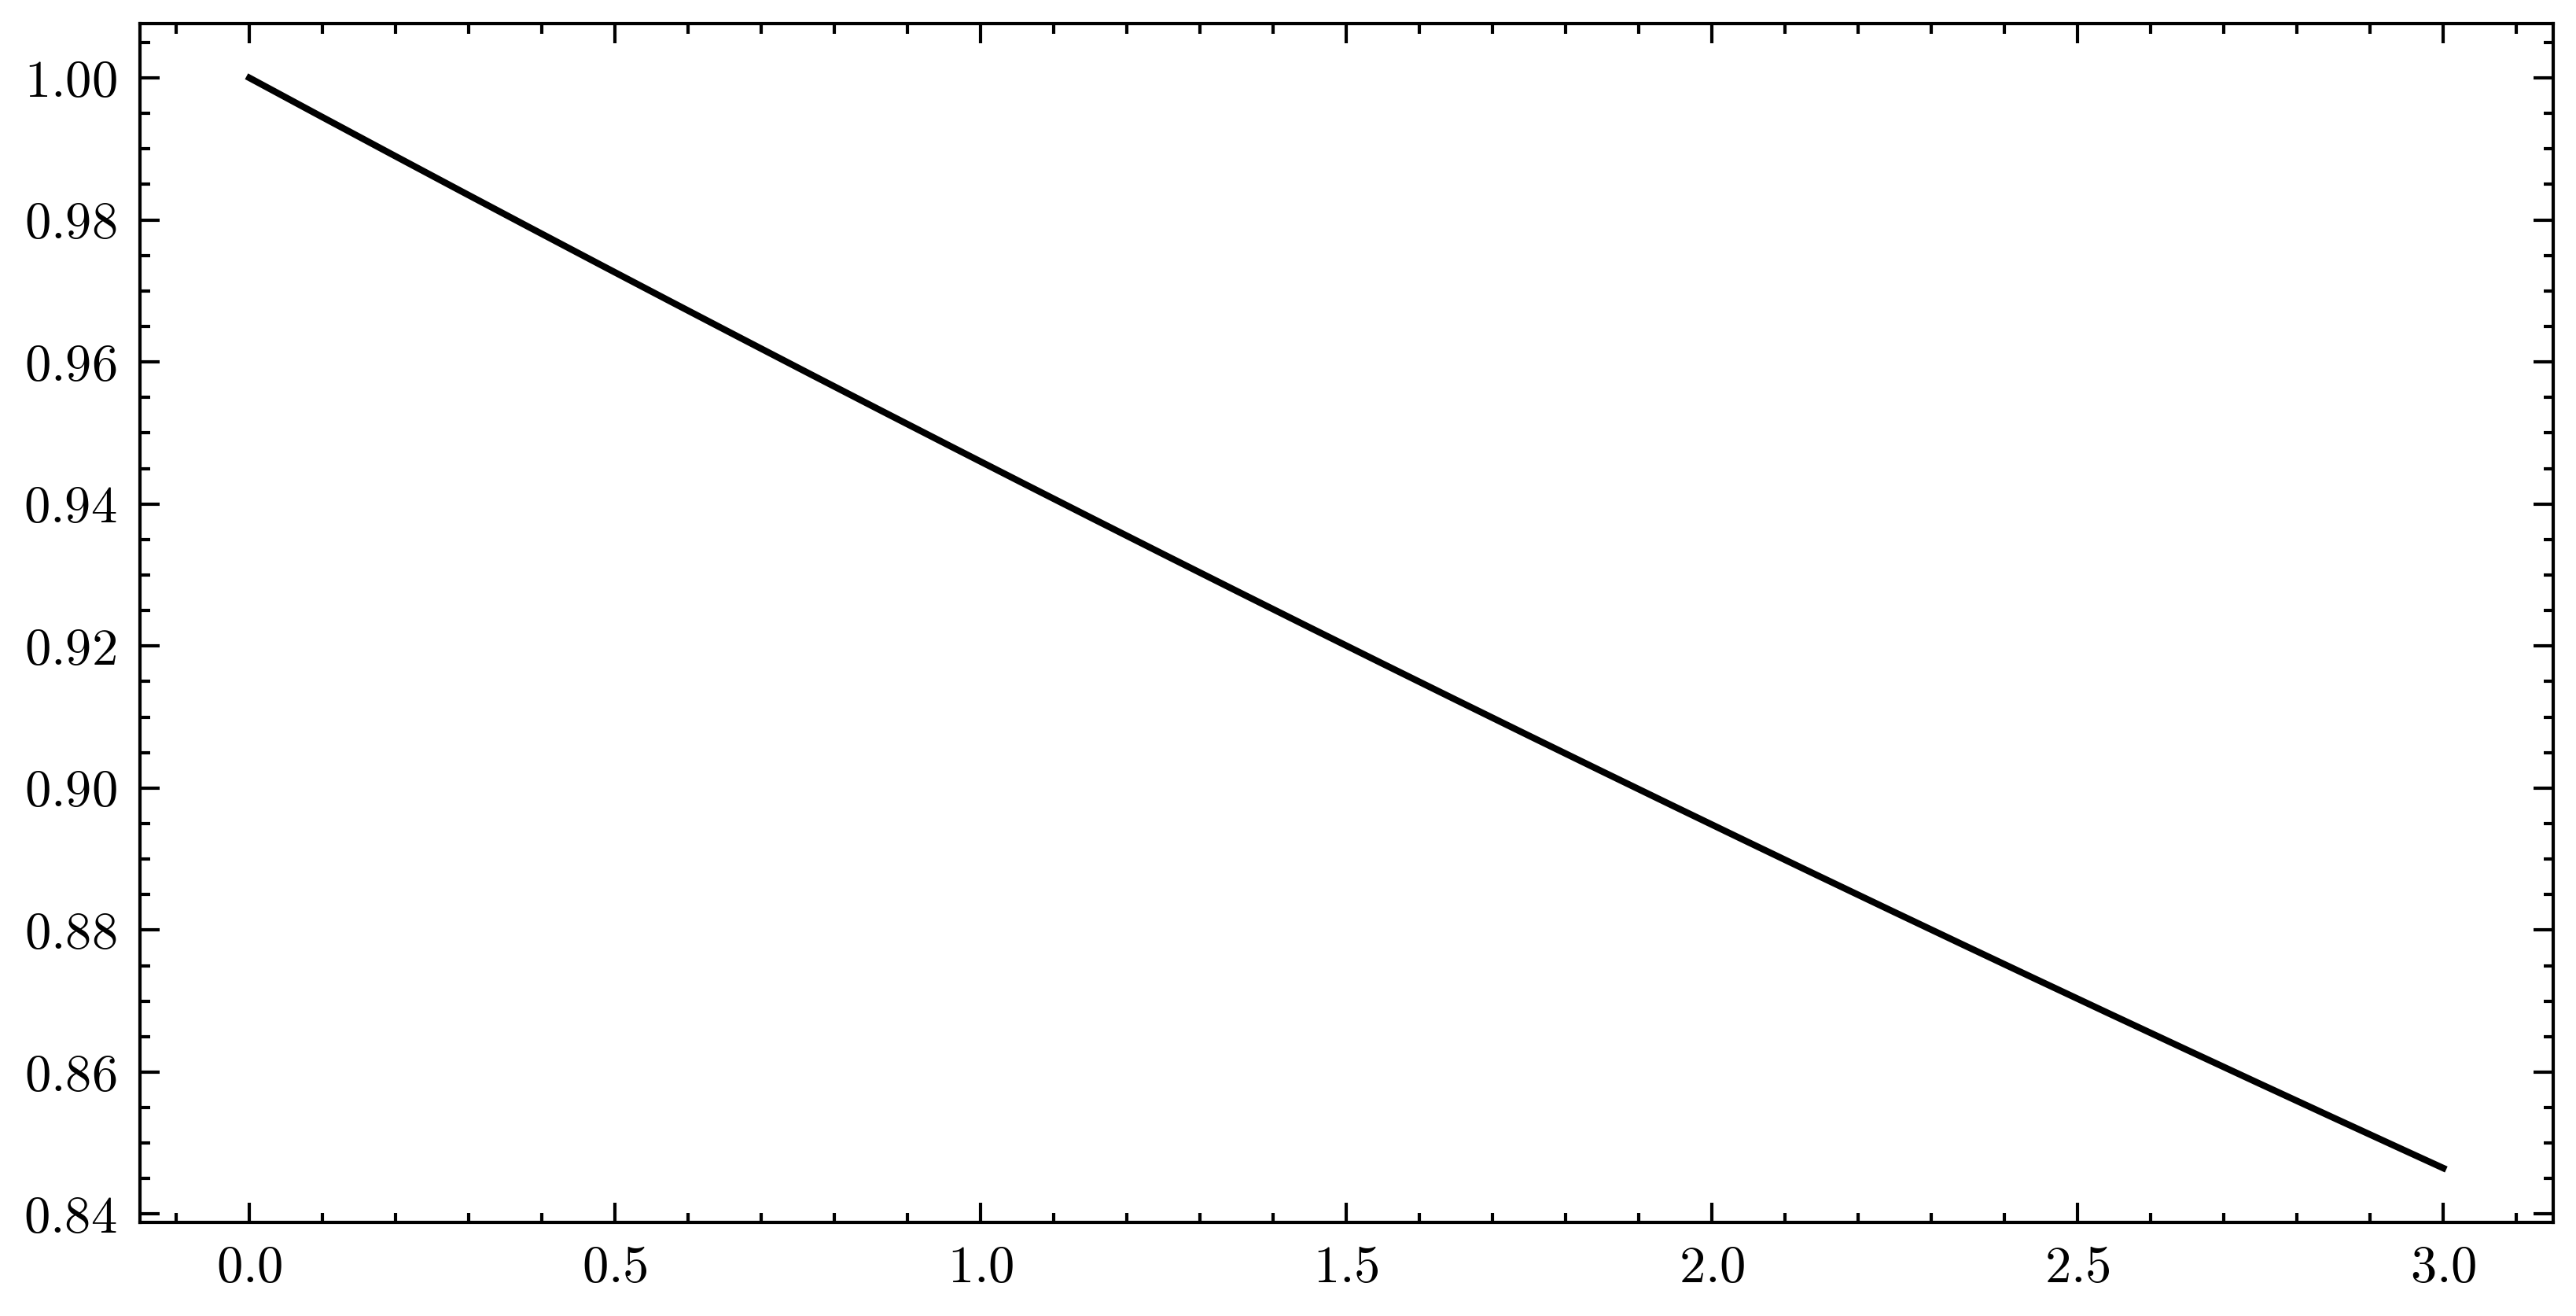

In [53]:
x = np.linspace(0, 3, 1000)

plt.plot(x, 1/np.exp(x/18))